In [ ]:
from google.colab import files
a = files.upload()

Saving amazon_alexa.tsv to amazon_alexa.tsv


# Step 1 - convert object class into integer
. 1.Verified Reviews
. 2.Variety Of Products

# Step 2- I have two numerical values

1. Rating 
2. Feedback

# Step 3- Drop the Date and Time from our Dataset because it will of no use predicting the output

# Step 4 - Perform NLP on the Object Types to convert into Type Integer

# Step 5 - Create a model to predict the review of the particular product(True And False)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("amazon_alexa.tsv",sep = "\t")
data.head(7)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1


In [3]:
columns = []
for i in data.columns:
  columns.append(i)
columns

['rating', 'date', 'variation', 'verified_reviews', 'feedback']

In [4]:
data.shape

(3150, 5)

In [5]:
for i in columns:
  print("number of unique value in",i,"is =",len(np.unique(data[i])))

number of unique value in rating is = 5
number of unique value in date is = 77
number of unique value in variation is = 16
number of unique value in verified_reviews is = 2301
number of unique value in feedback is = 2


In [6]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [7]:
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [9]:
data.drop(labels="date",axis=1,inplace=True)

In [10]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


In [11]:
from  sklearn.preprocessing import LabelEncoder
data["variation"] = LabelEncoder().fit_transform(data["variation"])

In [12]:
data.head()

,rating,variation,verified_reviews,feedback
0,5,5,Love my Echo!,1
1,5,5,Loved it!,1
2,4,10,"Sometimes while playing a game, you can answer...",1
3,5,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,5,Music,1


In [ ]:
!pip install seaborn --upgrade

In [13]:
data['rating'] = data['rating'].astype(float)

In [14]:
data.head()

,rating,variation,verified_reviews,feedback
0,5.0,5,Love my Echo!,1
1,5.0,5,Loved it!,1
2,4.0,10,"Sometimes while playing a game, you can answer...",1
3,5.0,5,I have had a lot of fun with this thing. My 4 ...,1
4,5.0,5,Music,1


(array([ 161.,    0.,   96.,    0.,    0.,  152.,    0.,  455.,    0.,
        2286.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

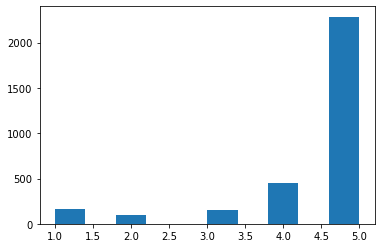

In [15]:
#sns.distplot(data,x='rating')
plt.hist(data['rating'])

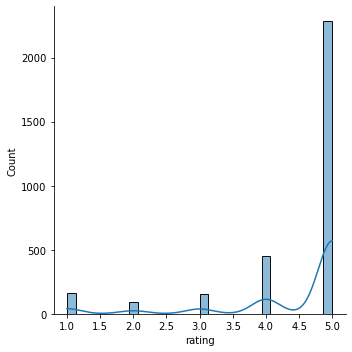

In [16]:
sns.displot(data['rating'],kde=True)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            3150 non-null   float64
 1   variation         3150 non-null   int32  
 2   verified_reviews  3150 non-null   object 
 3   feedback          3150 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 86.3+ KB


<AxesSubplot:xlabel='rating', ylabel='count'>

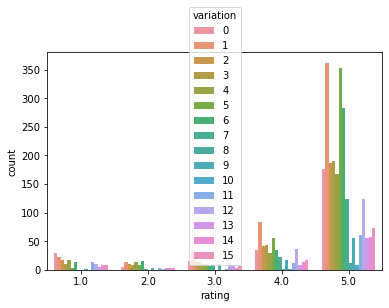

In [18]:
sns.countplot(x='rating',hue='variation',data=data)

<AxesSubplot:xlabel='rating', ylabel='count'>

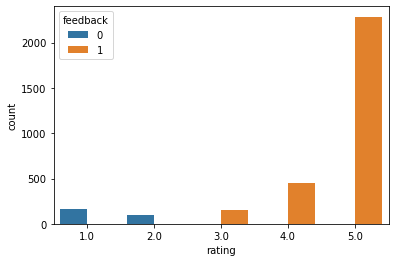

In [19]:
sns.countplot(x='rating',hue='feedback',data=data)

<AxesSubplot:xlabel='variation', ylabel='count'>

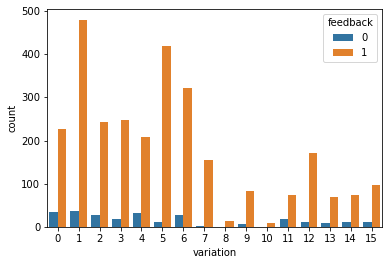

In [20]:
sns.countplot(x='variation',hue='feedback',data=data)

In [21]:
data.drop(labels=['variation','rating'],axis=1,inplace=True)

In [22]:
total_value = len(data['feedback'])
positive_comment = []
negative_comment = []

for i in data['feedback']:
  if i == 1:
    positive_comment.append(data['feedback'])
  else:
    negative_comment.append(data['feedback'])
  
print(len(positive_comment),len("negative_comment"))
percent_of_positive_comment = (len(positive_comment)/total_value)*100
percent_of_negative_comment = (len(negative_comment)/total_value)*100

print("Percentage of positive comment = ",percent_of_positive_comment,'%')
print("Percentage of negative comment = ",percent_of_negative_comment,"%")

2893 16
Percentage of positive comment =  91.84126984126985 %
Percentage of negative comment =  8.158730158730158 %


<AxesSubplot:xlabel='feedback', ylabel='count'>

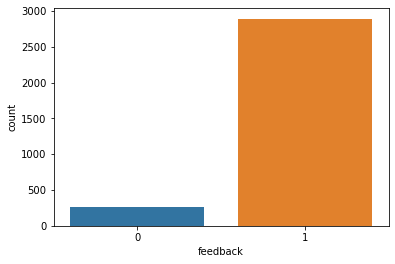

In [23]:
sns.countplot(x='feedback',data=data)

In [24]:
data.head(5)

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [25]:
x = data['verified_reviews']
y = data['feedback']

In [26]:
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [27]:
tokenizer = Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(x)

In [28]:
x = tokenizer.texts_to_sequences(x)

In [29]:
from keras.preprocessing.sequence import pad_sequences

In [30]:
x_pad = pad_sequences(x,maxlen=80,padding='post')
x_pad[0]

array([11,  8, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_pad,y, test_size=0.33,random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
randomforest_classifier = RandomForestClassifier(n_estimators = 1,criterion ='entropy',class_weight={0:6,1:1})
randomforest_classifier.fit(x_train, y_train)
Y_train_predict = randomforest_classifier.predict(x_train)
Y_predict = randomforest_classifier.predict(x_test)
Y_predict[1]

1

In [34]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,Y_predict))

0.8423076923076923


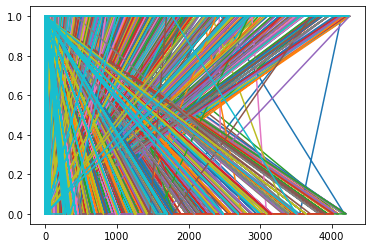

In [35]:
plt.plot(x_train,randomforest_classifier.predict(x_train))
plt.show()

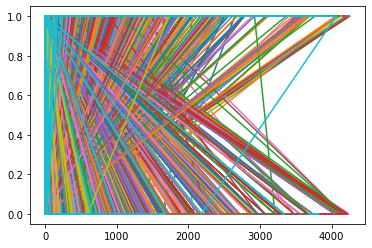

In [36]:
plt.plot(x_test,randomforest_classifier.predict(x_test))
plt.show()

In [38]:
def review_bot(feedback):
  sentence_lst=[]
  sentence_lst.append(feedback)
  sentence_seq = tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans=randomforest_classifier.predict(sentence_padded)
  if ans.all() == 1:
    print("positive feedback")
  else:
    print("negative feedback")
review_bot(str(input("Enter a review : ")))

Enter a review : i love driving car
positive feedback
